In [115]:
import pandas as pd
import root_config as rc
rc.configure()
from detectdd import config


# Baselining of ML models using SVM

In [116]:
filename = 'vitals_data_before_and_after_ABCD.csv'
# filename ='vitals_data_before_and_after_ABC.csv'
with_label_1 = pd.read_csv(config.out_dir / filename)
with_label_1

,Unnamed: 0.1,Unnamed: 0,stay_id,dose_b_time,subject_id,charttime,heart_rate,sbp,dbp,mbp
0,0,0,30002654,2154-10-19 06:31:00,15978672,2154-10-19 06:05:00,NaN,112.0,64.0,77.0
1,1,1,30002654,2154-10-19 06:31:00,15978672,2154-10-19 13:00:00,65.0,109.0,67.0,77.0
2,2,2,30002654,2154-10-19 06:31:00,15978672,2154-10-19 15:00:00,71.0,NaN,NaN,NaN
3,3,3,30002654,2154-10-19 06:31:00,15978672,2154-10-19 10:00:00,67.0,NaN,NaN,NaN
4,4,4,30002654,2154-10-19 06:31:00,15978672,2154-10-19 08:00:00,69.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
457101,457101,785,39945913,2183-06-16 15:48:00,19733670,2183-06-17 01:00:00,108.0,104.0,49.0,66.0
457102,457102,786,39945913,2183-06-16 15:48:00,19733670,2183-06-16 18:00:00,117.0,88.0,44.0,57.0
457103,457103,787,39945913,2183-06-16 15:48:00,19733670,2183-06-16 17:00:00,115.0,100.0,44.0,60.0
457104,457104,788,39945913,2183-06-16 15:48:00,19733670,2183-06-16 15:00:00,126.0,95.0,46.0,61.0


In [117]:
with_label_1 = with_label_1.drop(['stay_id', 'subject_id', 'charttime'], axis=1)
with_label_1 = with_label_1.drop('Unnamed: 0', axis=1)
with_label_1 = with_label_1.drop('dose_b_time', axis=1)
with_label_1

,Unnamed: 0.1,heart_rate,sbp,dbp,mbp
0,0,NaN,112.0,64.0,77.0
1,1,65.0,109.0,67.0,77.0
2,2,71.0,NaN,NaN,NaN
3,3,67.0,NaN,NaN,NaN
4,4,69.0,NaN,NaN,NaN
...,...,...,...,...,...
457101,457101,108.0,104.0,49.0,66.0
457102,457102,117.0,88.0,44.0,57.0
457103,457103,115.0,100.0,44.0,60.0
457104,457104,126.0,95.0,46.0,61.0


In [118]:
with_label_1['label'] = 1
with_label_1


,Unnamed: 0.1,heart_rate,sbp,dbp,mbp,label
0,0,NaN,112.0,64.0,77.0,1
1,1,65.0,109.0,67.0,77.0,1
2,2,71.0,NaN,NaN,NaN,1
3,3,67.0,NaN,NaN,NaN,1
4,4,69.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...
457101,457101,108.0,104.0,49.0,66.0,1
457102,457102,117.0,88.0,44.0,57.0,1
457103,457103,115.0,100.0,44.0,60.0,1
457104,457104,126.0,95.0,46.0,61.0,1


In [119]:
missing_values = with_label_1.isnull().sum()
print(missing_values)

Unnamed: 0.1         0
heart_rate      122243
sbp             113495
dbp             113551
mbp             113140
label                0
dtype: int64


In [120]:
cols_to_fill = ['heart_rate', 'sbp', 'dbp', 'mbp']

for col in cols_to_fill:
    with_label_1[col].fillna(method='ffill', inplace=True)
    with_label_1[col].fillna(method='bfill', inplace=True)

with_label_1 = with_label_1.drop('Unnamed: 0.1', axis=1)
with_label_1

,heart_rate,sbp,dbp,mbp,label
0,65.0,112.0,64.0,77.0,1
1,65.0,109.0,67.0,77.0,1
2,71.0,109.0,67.0,77.0,1
3,67.0,109.0,67.0,77.0,1
4,69.0,109.0,67.0,77.0,1
...,...,...,...,...,...
457101,108.0,104.0,49.0,66.0,1
457102,117.0,88.0,44.0,57.0,1
457103,115.0,100.0,44.0,60.0,1
457104,126.0,95.0,46.0,61.0,1


In [121]:
with_label_0 = pd.read_csv('vitals_data_before_and_after_no_drug_interaction.csv')
with_label_0

,Unnamed: 0.1,Unnamed: 0,stay_id,dose_b_time,subject_id,charttime,heart_rate,sbp,dbp,mbp
0,0,0,30000484,2136-01-15 22:02:00,18421337,2136-01-15 18:00:00,89.0,103.0,22.0,41.0
1,1,1,30000484,2136-01-15 22:02:00,18421337,2136-01-16 01:00:00,99.0,NaN,NaN,NaN
2,2,2,30000484,2136-01-15 22:02:00,18421337,2136-01-15 14:30:00,NaN,129.0,113.0,NaN
3,3,3,30000484,2136-01-15 22:02:00,18421337,2136-01-16 00:00:00,97.0,NaN,NaN,NaN
4,4,4,30000484,2136-01-15 22:02:00,18421337,2136-01-15 14:00:00,92.0,NaN,NaN,58.0
...,...,...,...,...,...,...,...,...,...,...
1060725,1060725,24,39323481,2121-03-10 08:34:00,11652327,2121-03-10 19:00:00,119.0,108.0,56.0,72.0
1060726,1060726,25,39323481,2121-03-10 08:34:00,11652327,2121-03-09 22:30:00,111.0,139.0,71.0,94.0
1060727,1060727,26,39323481,2121-03-10 08:34:00,11652327,2121-03-09 22:15:00,109.0,125.0,63.0,85.0
1060728,1060728,27,39323481,2121-03-10 08:34:00,11652327,2121-03-09 22:00:00,110.0,129.0,65.0,87.0


In [122]:
with_label_0 = with_label_0.drop(['stay_id', 'subject_id', 'charttime'], axis=1)
with_label_0 = with_label_0.drop('Unnamed: 0', axis=1)
with_label_0 = with_label_0.drop('Unnamed: 0.1', axis=1)
with_label_0 = with_label_0.drop('dose_b_time', axis=1)
with_label_0

,heart_rate,sbp,dbp,mbp
0,89.0,103.0,22.0,41.0
1,99.0,NaN,NaN,NaN
2,NaN,129.0,113.0,NaN
3,97.0,NaN,NaN,NaN
4,92.0,NaN,NaN,58.0
...,...,...,...,...
1060725,119.0,108.0,56.0,72.0
1060726,111.0,139.0,71.0,94.0
1060727,109.0,125.0,63.0,85.0
1060728,110.0,129.0,65.0,87.0


In [123]:
cols_to_fill = ['heart_rate', 'sbp', 'dbp', 'mbp']

for col in cols_to_fill:
    with_label_0[col].fillna(method='ffill', inplace=True)
    with_label_0[col].fillna(method='bfill', inplace=True)

with_label_0

,heart_rate,sbp,dbp,mbp
0,89.0,103.0,22.0,41.0
1,99.0,103.0,22.0,41.0
2,99.0,129.0,113.0,41.0
3,97.0,129.0,113.0,41.0
4,92.0,129.0,113.0,58.0
...,...,...,...,...
1060725,119.0,108.0,56.0,72.0
1060726,111.0,139.0,71.0,94.0
1060727,109.0,125.0,63.0,85.0
1060728,110.0,129.0,65.0,87.0


In [124]:
missing_values = with_label_0.isnull().sum()
print(missing_values)

heart_rate    0
sbp           0
dbp           0
mbp           0
dtype: int64


In [125]:
with_label_0['label'] = 0
with_label_0

,heart_rate,sbp,dbp,mbp,label
0,89.0,103.0,22.0,41.0,0
1,99.0,103.0,22.0,41.0,0
2,99.0,129.0,113.0,41.0,0
3,97.0,129.0,113.0,41.0,0
4,92.0,129.0,113.0,58.0,0
...,...,...,...,...,...
1060725,119.0,108.0,56.0,72.0,0
1060726,111.0,139.0,71.0,94.0,0
1060727,109.0,125.0,63.0,85.0,0
1060728,110.0,129.0,65.0,87.0,0


In [126]:
combined_original_df = pd.concat([with_label_0, with_label_1], ignore_index=True)
combined_original_df

,heart_rate,sbp,dbp,mbp,label
0,89.0,103.0,22.0,41.0,0
1,99.0,103.0,22.0,41.0,0
2,99.0,129.0,113.0,41.0,0
3,97.0,129.0,113.0,41.0,0
4,92.0,129.0,113.0,58.0,0
...,...,...,...,...,...
1517831,108.0,104.0,49.0,66.0,1
1517832,117.0,88.0,44.0,57.0,1
1517833,115.0,100.0,44.0,60.0,1
1517834,126.0,95.0,46.0,61.0,1


In [127]:
print(len(combined_original_df))
print(len(combined_original_df.dropna()))


1517836
1517836


# Train model

In [128]:
sampled_with_label_0 = with_label_0.sample(n=50000, random_state=42)
sampled_with_label_1 = with_label_1.sample(n=50000, random_state=42)

In [129]:
combined_df = pd.concat([sampled_with_label_0, sampled_with_label_1], ignore_index=True)

In [130]:
v_sampled_with_label_0 = with_label_0.sample(n=50000, random_state=42)
V_sampled_with_label_1 = with_label_1.sample(n=50000, random_state=42)
print(len(v_sampled_with_label_0))
print(len(V_sampled_with_label_1))

50000
50000


In [131]:
v_df = pd.concat([sampled_with_label_0, sampled_with_label_1], ignore_index=True)

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X = combined_df.drop('label', axis=1).values
y = combined_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = SVC(kernel='rbf', verbose=True)  
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LibSVM]Accuracy: 0.5485
              precision    recall  f1-score   support

           0       0.55      0.57      0.56     10035
           1       0.55      0.53      0.54      9965

    accuracy                           0.55     20000
   macro avg       0.55      0.55      0.55     20000
weighted avg       0.55      0.55      0.55     20000


In [133]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

mcc_value = matthews_corrcoef(y_test, y_pred)
print(filename)
print("\n********* MCC:", round(mcc_value, 4))


Confusion Matrix:
[[5711 4324]
 [4706 5259]]
vitals_data_before_and_after_ABCD.csv

********* MCC: 0.0969


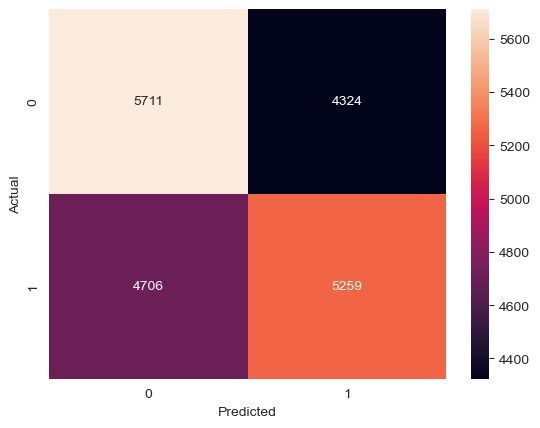

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [135]:
# from sklearn.metrics import accuracy_score
# 
# X = v_df.drop('label', axis=1).values
# y = v_df['label'].values
# 
# X_scaled = scaler.transform(X)
# 
# y_pred = clf.predict(X_scaled)
# 
# accuracy = accuracy_score(y, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")


In [136]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# 
# cm = confusion_matrix(y, y_pred)
# sns.heatmap(cm, annot=True, fmt="d")
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [137]:
# from sklearn.metrics import roc_curve, auc
# 
# fpr, tpr, thresholds = roc_curve(y, y_pred)
# roc_auc = auc(fpr, tpr)
# 
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic Curve')
# plt.legend(loc="lower right")
# plt.show()
